In [6]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "D:/ML/"
print(DOWNLOAD_ROOT)
DATASET_PATH = os.path.join("datasets", "Countries")
DIR_PATH = {"Afganistan":os.path.join(DATASET_PATH, "Afganistan"),
            "China":os.path.join(DATASET_PATH, "China"),
            "CAR":os.path.join(DATASET_PATH, "CAR"),
           "Ethiopia":os.path.join(DATASET_PATH, "Ethiopia"),
           "India":os.path.join(DATASET_PATH, "India"),
           "Iran":os.path.join(DATASET_PATH, "Iran"),
            "KNDR":os.path.join(DATASET_PATH, "KNDR"),
            "Libya":os.path.join(DATASET_PATH, "Libya"),
           "Morocco":os.path.join(DATASET_PATH, "Morocco"),
           "Sudan":os.path.join(DATASET_PATH, "Sudan"),
           "Syria":os.path.join(DATASET_PATH, "Syria"),
           "Turkey":os.path.join(DATASET_PATH, "Turkey"),
            "Argentina":os.path.join(DATASET_PATH, "Argentina"),
            #"LatAmerica":os.path.join(DATASET_PATH, "LatAmerica"),
            "DRK_Congo":os.path.join(DATASET_PATH, "DRK_Congo"),
            "Burkina Faso":os.path.join(DATASET_PATH, "Burkina Faso"),
            "Niger":os.path.join(DATASET_PATH, "Niger"),
            "Mali":os.path.join(DATASET_PATH, "Mali"),
            "Senegal":os.path.join(DATASET_PATH, "Senegal"),
            "Egipet":os.path.join(DATASET_PATH, "Egipet"),
            "Gvineya":os.path.join(DATASET_PATH, "Gvineya"),
            "Venesuela":os.path.join(DATASET_PATH, "Venesuela"),
            "Algeria":os.path.join(DATASET_PATH, "Algeria"),
            "Zimbabve":os.path.join(DATASET_PATH, "Zimbabve"),
            "Tunis":os.path.join(DATASET_PATH, "Tunis")            
           }
filenames = {}
for items in DIR_PATH.keys():
    print(items)
    filenames[items] = [name for name in sorted(os.listdir(DIR_PATH[items])) ] 

D:/ML/
Afganistan
China
CAR
Ethiopia
India
Iran
KNDR
Libya
Morocco
Sudan
Syria
Turkey
Argentina
DRK_Congo
Burkina Faso
Niger
Mali
Senegal
Egipet
Gvineya
Venesuela
Algeria
Zimbabve
Tunis


In [7]:
stemming=False # Stemming control
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")

In [8]:
ru_stopwords = set(
        """
    а авось ага агу аж ай али алло ау ах ая
    б будем будет будете будешь буду будут будучи будь будьте бы был была были было
    быть бац без безусловно бишь благо благодаря ближайшие близко более больше
    будто бывает бывала бывали бываю бывают бытует
    в вам вами вас весь во вот все всё всего всей всем всём всеми всему всех всею
    всея всю вся вы ваш ваша ваше ваши вдали вдобавок вдруг ведь везде вернее
    взаимно взаправду видно вишь включая вместо внакладе вначале вне вниз внизу
    вновь вовсе возможно воистину вокруг вон вообще вопреки вперекор вплоть
    вполне вправду вправе впрочем впрямь вресноту вроде вряд всегда всюду
    всякий всякого всякой всячески вчеред
    г го где гораздо гав
    д да для до дабы давайте давно давным даже далее далеко дальше данная
    данного данное данной данном данному данные данный данных дану данунах
    даром де действительно довольно доколе доколь долго должен должна
    должно должны должный дополнительно другая другие другим другими
    других другое другой
    е его едим едят ее её ей ел ела ем ему емъ если ест есть ешь еще ещё ею едва
    ежели еле
    ж же
    з за затем зато зачем здесь значит зря
    и из или им ими имъ их ибо иль имеет имел имела имело именно иметь иначе
    иногда иным иными итак ишь
    й
    к как кем ко когда кого ком кому комья которая которого которое которой котором
    которому которою которую которые который которым которыми которых кто ка кабы
    каждая каждое каждые каждый кажется казалась казались казалось казался казаться
    какая какие каким какими каков какого какой какому какою касательно кой коли
    коль конечно короче кроме кстати ку куда
    л ли либо лишь любая любого любое любой любом любую любыми любых
    м меня мне мной мною мог моги могите могла могли могло могу могут мое моё моего
    моей моем моём моему моею можем может можете можешь мои мой моим моими моих
    мочь мою моя мы мало меж между менее меньше мимо многие много многого многое
    многом многому можно мол му
    н на нам нами нас наса наш наша наше нашего нашей нашем нашему нашею наши нашим
    нашими наших нашу не него нее неё ней нем нём нему нет нею ним ними них но
    наверняка наверху навряд навыворот над надо назад наиболее наизворот
    наизнанку наипаче накануне наконец наоборот наперед наперекор наподобие
    например напротив напрямую насилу настоящая настоящее настоящие настоящий
    насчет нате находиться начала начале неважно негде недавно недалеко незачем
    некем некогда некому некоторая некоторые некоторый некоторых некто некуда
    нельзя немногие немногим немного необходимо необходимости необходимые
    необходимым неоткуда непрерывно нередко несколько нету неужели нечего
    нечем нечему нечто нешто нибудь нигде ниже низко никак никакой никем
    никогда никого никому никто никуда ниоткуда нипочем ничего ничем ничему
    ничто ну нужная нужно нужного нужные нужный нужных ныне нынешнее нынешней
    нынешних нынче
    о об один одна одни одним одними одних одно одного одной одном одному одною
    одну он она оне они оно от оба общую обычно ого однажды однако ой около оный
    оп опять особенно особо особую особые откуда отнелижа отнелиже отовсюду
    отсюда оттого оттот оттуда отчего отчему ох очевидно очень ом
    п по при паче перед под подавно поди подобная подобно подобного подобные
    подобный подобным подобных поелику пожалуй пожалуйста позже поистине
    пока покамест поколе поколь покуда покудова помимо понеже поприще пор
    пора посему поскольку после посреди посредством потом потому потомушта
    похожем почему почти поэтому прежде притом причем про просто прочего
    прочее прочему прочими проще прям пусть
    р ради разве ранее рано раньше рядом
    с сам сама сами самим самими самих само самого самом самому саму свое своё
    своего своей своем своём своему своею свои свой своим своими своих свою своя
    себе себя собой собою самая самое самой самый самых сверх свыше се сего сей
    сейчас сие сих сквозь сколько скорее скоро следует слишком смогут сможет
    сначала снова со собственно совсем сперва спокону спустя сразу среди сродни
    стал стала стали стало стать суть сызнова
    та то ту ты ти так такая такие таким такими таких такого такое такой таком такому такою
    такую те тебе тебя тем теми тех тобой тобою того той только том томах тому
    тот тою также таки таков такова там твои твоим твоих твой твоя твоё
    теперь тогда тоже тотчас точно туда тут тьфу тая
    у уже увы уж ура ух ую
    ф фу
    х ха хе хорошо хотел хотела хотелось хотеть хоть хотя хочешь хочу хуже
    ч чего чем чём чему что чтобы часто чаще чей через чтоб чуть чхать чьим
    чьих чьё чё
    ш ша
    щ ща щас
    ы ых ые ый
    э эта эти этим этими этих это этого этой этом этому этот этою эту эдак эдакий
    эй эка экий этак этакий эх
    ю
    я явно явных яко якобы якоже
    
    и что не это  быть этот это свой как - этот весь быть что ▫ но г. % 
    afgbezparandzhi argentinarusa irandezhurniy info raspp аль
    """.split()
    )

In [9]:
from charset_normalizer import from_path
import string

def remove_chars_from_text(text, chars):
    # return "".join([ch for ch in text if ch not in chars])
    content = ''
    for ch in text:
        if ch not in chars:
            content = content + ''.join(ch)
        else:
            content = content + ''.join(' ')
    return content

import re

def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)
spec_chars = string.punctuation + '\r' + '\n\xa0«»\t—…' 

x_temp = []
y_temp = []
for item in filenames.keys():
    post_temp=[]
    for names in filenames[item]:
        content = str(from_path(DIR_PATH[item]+"\\"+names).best()).lower()  
        content = remove_emojis(content)
        # content = re.sub(r'(\\u[0-9A-Fa-f]+)', lambda matchobj: chr(int(matchobj.group(0)[2:], 16)), content)
        content = remove_chars_from_text(content, spec_chars)
        content = remove_chars_from_text(content, string.digits)
        for i in range(1, 10):
            content = content.replace('  ', ' ')
        filtered_words = []
        for token in content.split():
            if token not in ru_stopwords and len(token)>2:
                if stemming and token is not None:
                    filtered_words.append(stemmer.stem(token))
                    #print('{} -{}'.format(token,stemmer.stem(token)))
                else:
                    filtered_words.append(token)
                      
        content = ' '.join(filtered_words) 
        x_temp.append(content)
        y_temp.append(item)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

count_ngram = CountVectorizer(ngram_range=(2,2))
X_train_transformed_ngram = count_ngram.fit_transform(x_temp)
vocab = count_ngram.vocabulary_
count_values = X_train_transformed_ngram.toarray().sum(axis=0)
ng_text_feq =[]
for ng_count, ng_text in sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True):
    if ng_count>7:
        #print(ng_count, ng_text)
        ng_text_feq.append(ng_text)
print(len(ng_text_feq))
corpus_with_ngram = []
for text in x_temp:    
    for item in ng_text_feq:
        text = text.replace(item, item.replace(' ', '_'))        
    corpus_with_ngram.append(text)


6116


In [11]:
corpus_with_ngram [:8]

['территории_афганистана террористические_группировки представляющие угрозу афганистану региону миру счастью прихода иэа территория афганистана контролем исламского эмирата заявил ведущему заместитель официального_представителя талибов билал карими брешей территории_афганистана прятались террористы считает карими заявил приходом талибов границы страны безопасными охраняемыми временем пакистанский институт исследования проблем мира сообщил год территории_афганистана совершено атак повлекших гибель ранения мирных_жителей летом наличии тысяч боевиков запрещена россии территории_афганистана заявлял спецпредставитель_президента_афганистану замир_кабулов осенью замглавы_мид_россии олег сыромолотов сообщал наличии афганистане терргруппировок общей численностью_тысяч_человек',
 'конгрессмены республиканцы начали_расследование вывода_войск_сша афганистаначлен палаты_представителей_конгресса республиканец майкл маккол потребовал госдепа сша предоставить документы связанные выводом американских_в

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split


X = np.array(corpus_with_ngram, dtype=object)
y = np.array(y_temp)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score

count = CountVectorizer(max_features=20000)
X_train_transformed = count.fit_transform(X_train)
#rf = DecisionTreeClassifier(max_depth=depth , min_samples_leaf=50)
rf = DecisionTreeClassifier()
rf.fit(X_train_transformed, y_train)

y_pred = rf.predict_proba(X_train_transformed)[:, 1]
score = cross_val_score(rf, X_train_transformed, y_train, cv=3, verbose=3)
print(score.mean())
print(cross_val_score(rf, X_train_transformed, y_train, scoring='accuracy'))
print(cross_val_score(rf, X_train_transformed, y_train, scoring='f1_macro'))    

[CV] END ................................ score: (test=0.767) total time=   1.6s
[CV] END ................................ score: (test=0.740) total time=   1.4s
[CV] END ................................ score: (test=0.748) total time=   1.5s
0.7515084178671355
[0.77013423 0.7691016  0.7581864  0.78169605 0.74391268]
[0.7683207  0.77687519 0.75317318 0.77838661 0.75075084]


In [14]:
from sklearn.metrics import precision_score, recall_score

X_test_transformed = count.transform(X_test)

rf.fit(X_test_transformed, y_test)

y_pred = rf.predict(X_test_transformed)

print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred, average='weighted')))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred, average='weighted')))

Precision: 99.36%
Recall: 99.33%


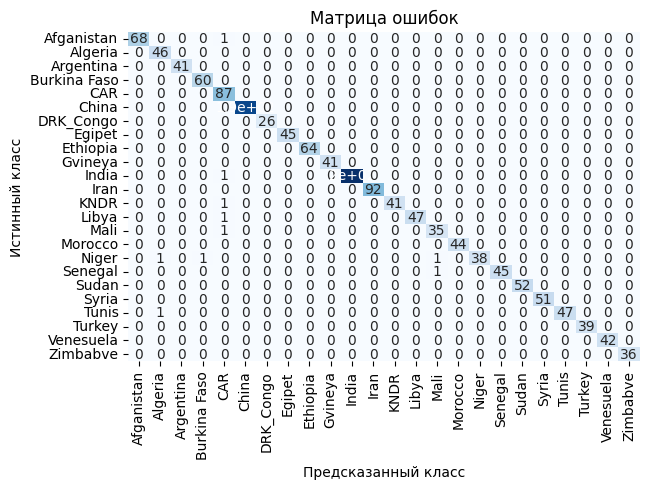

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns #pip install seaborn
from sklearn.metrics import confusion_matrix
import pandas as pd
# Создать матрицу ошибок
matrix = confusion_matrix(y_test, y_pred)
# Создать структуру DataFrame библиотеки pandas
dataframe = pd.DataFrame(matrix, index=rf.classes_, columns=rf.classes_)
# Создать тепловую карту
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Maтpицa ошибок")
plt.tight_layout()
plt.ylabel("Истинный класс")
plt.xlabel("Предсказанный класс")
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score

count = CountVectorizer(max_features=20000)
X_train_transformed = count.fit_transform(X_train)
#rf = DecisionTreeClassifier(max_depth=depth , min_samples_leaf=50)
rf_RandomForest = RandomForestClassifier(random_state=3, n_jobs=-1, class_weight="balanced")
rf_RandomForest.fit(X_train_transformed, y_train)

y_pred = rf_RandomForest.predict_proba(X_train_transformed)[:, 1]
score = cross_val_score(rf_RandomForest, X_train_transformed, y_train, cv=3, verbose=3)
print(score.mean())
print(cross_val_score(rf_RandomForest, X_train_transformed, y_train, scoring='accuracy'))
print(cross_val_score(rf_RandomForest, X_train_transformed, y_train, scoring='f1_macro'))    

[CV] END ................................ score: (test=0.837) total time=   1.5s
[CV] END ................................ score: (test=0.836) total time=   1.5s
[CV] END ................................ score: (test=0.830) total time=   1.6s
0.8346200904230537
[0.8397651  0.84466835 0.84466835 0.86901763 0.82283795]
[0.84424956 0.85055124 0.856232   0.86817622 0.83473003]


In [17]:
from sklearn.metrics import precision_score, recall_score

X_test_transformed = count.transform(X_test)

rf_RandomForest.fit(X_test_transformed, y_test)

y_pred_RandomForest = rf_RandomForest.predict(X_test_transformed)

print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred_RandomForest, average='weighted')))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred_RandomForest, average='weighted')))

Precision: 99.36%
Recall: 99.33%


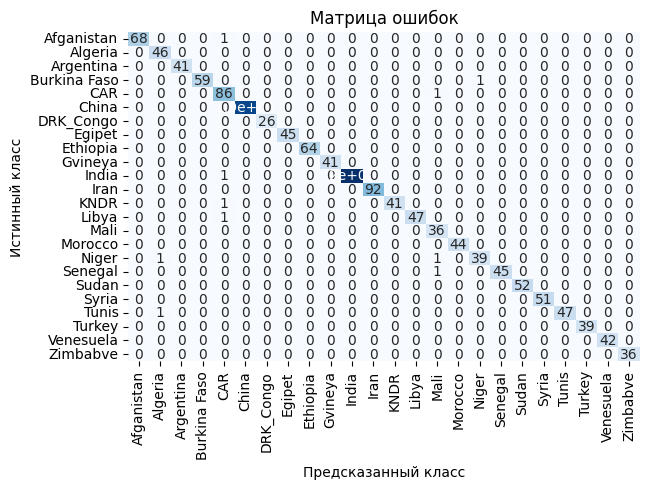

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns #pip install seaborn
from sklearn.metrics import confusion_matrix
import pandas as pd
# Создать матрицу ошибок
matrix = confusion_matrix(y_test, y_pred_RandomForest)
# Создать структуру DataFrame библиотеки pandas
dataframe = pd.DataFrame(matrix, index=rf_RandomForest.classes_, columns=rf_RandomForest.classes_)
# Создать тепловую карту
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Maтpицa ошибок")
plt.tight_layout()
plt.ylabel("Истинный класс")
plt.xlabel("Предсказанный класс")
plt.show()

In [19]:
impoгtances = rf_RandomForest.feature_importances_
feature_imp_df = pd.DataFrame({'Word': count.get_feature_names_out(), 'Importance': impoгtances}).sort_values('Importance', ascending=False) 
print(feature_imp_df[:50])

                                                    Word  Importance
1514                                        буркина_фасо    0.011731
7798                                             марокко    0.011383
19124                                                цар    0.010453
5363                                            зимбабве    0.010192
789                                            аргентине    0.009831
18038                                             турции    0.008724
5775                                               индии    0.008708
3064                                              гвинее    0.008497
15690                                              сирии    0.007889
7450                                               ливии    0.007307
920                                          афганистана    0.007270
6647                                                кндр    0.007269
15546                                           сенегала    0.007243
17981                             

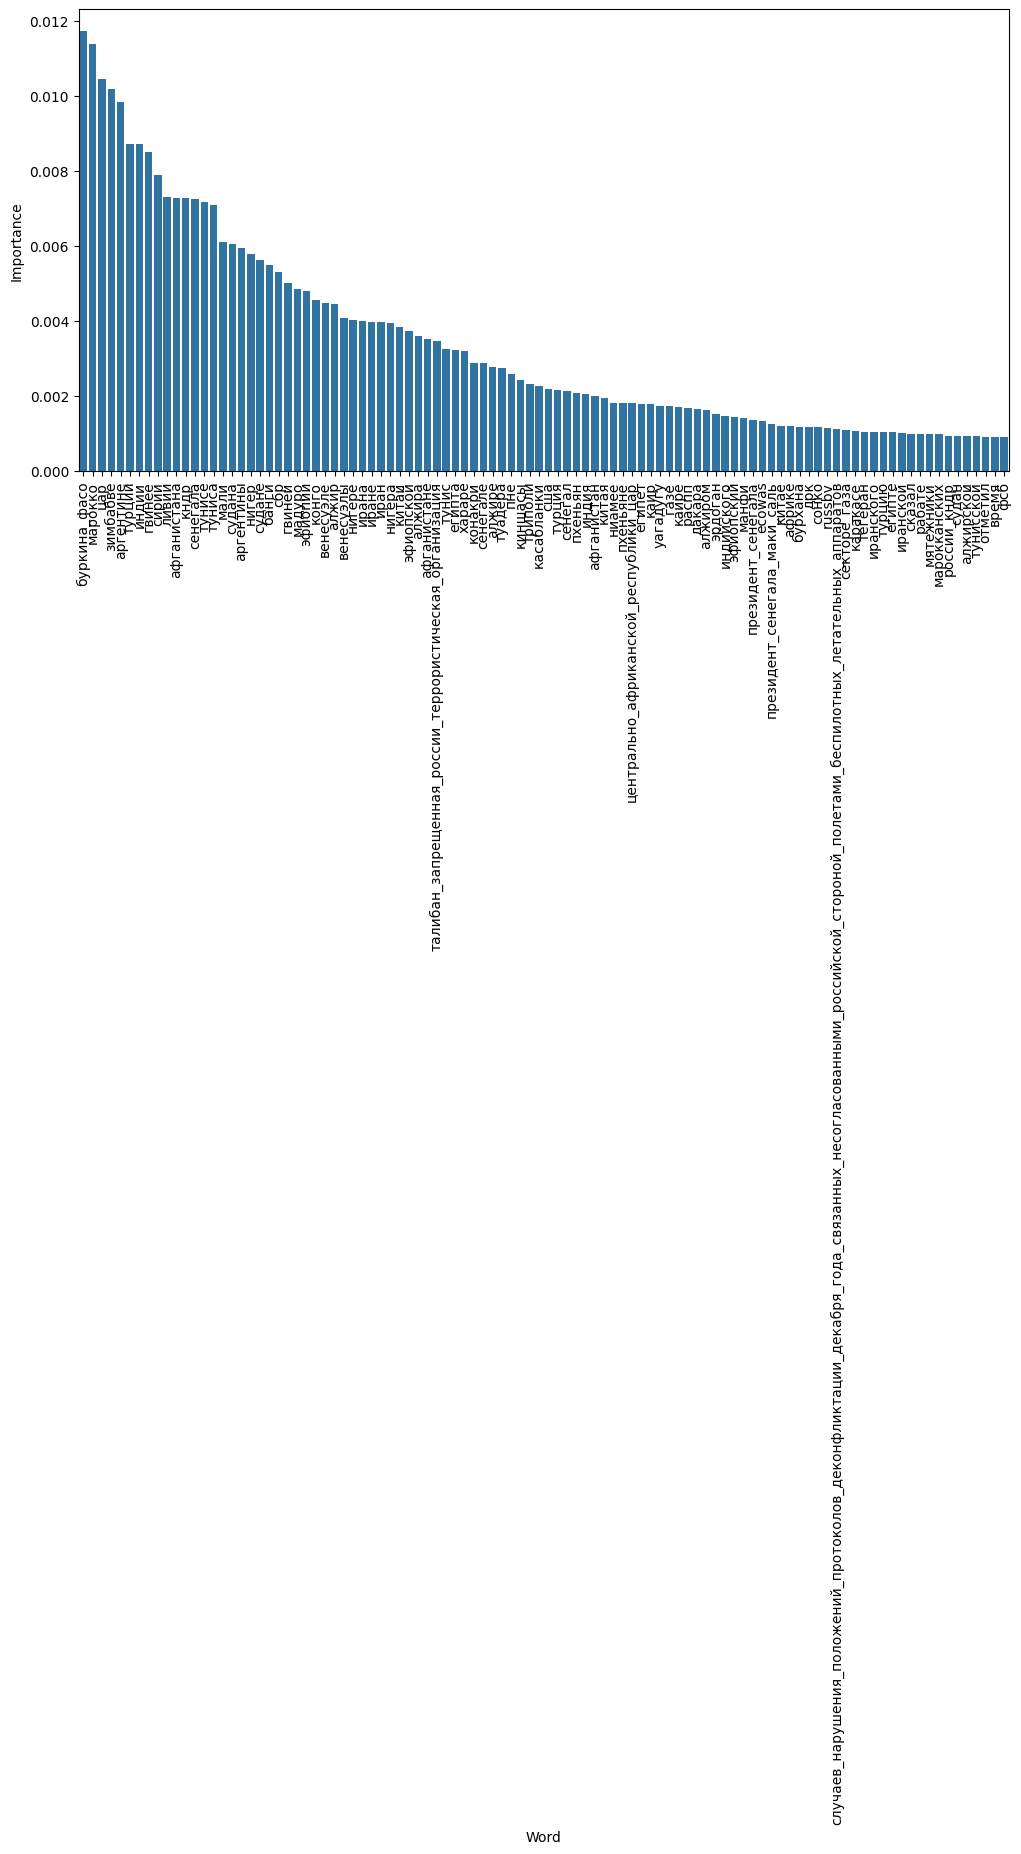

In [20]:
import pandas as pd
import seaborn as sns
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Word", y="Importance", data=feature_imp_df[:100])

ax.tick_params(axis='x', labelrotation=90)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), rotation=45, ha='right')
plt.show()


In [21]:
new_text = ['Нигер последовал примеру Мали, разорвав связи с Украиной после того, как пресс-секретарь разведывательного агентства Министерства обороны Украины признал, что Украина оказывала поддержку повстанцам, которые убили малийских вооруженных сил и российских агентов 25-27 июля в Тинзауатене, на севере Мали, недалеко от границы с Алжиром.Посол Украины в Сенегале также выразил безоговорочную поддержку малийским повстанцам, что привело к вызову посла в МИД Сенегала.',
            'Еще новости афганской промышленности. В Кандагаре спустя 18 лет возобновила работу текстильная фабрика. Официальные лица говорят, что они отремонтировали оборудование на фабрике за шесть месяцев, сообщают афганское СМИ. По словам работников фабрики, с возобновлением работы фабрики созданы рабочие места. 69-летний Мохаммад, проработавший на текстильной фабрике в Кандагаре значительное время, рад вернуться на работу.',
           'Накопленное непонимание между Китаем и США не может быть решено лишь одним подобным изящным жестом. Страны расходятся по широкому кругу вопросов, санкционный механизм против Китая не ослаблен. Поэтому отправка панд – это скорее демонстрация миролюбивой позиции Китая в противовес США.',
            'В Алжире, как правило, на похоронах мужчины сидят около дома, хорошо, если есть сад или терраса, а женщины в доме, надеть платок женщина должна обязательно, даже если в обычной жизни она не покрывает голову. Если покойный жил в квартире, то прямо во дворе ставят стулья и шатры со столами для мужчин.Готовят либо нанятые кухарки, либо родственницы покойного. Пока составляла пост от подруги услышала,что в их семье часто еду приносят те, кто приходит в дом, а готовить должны невестки, а не дочери умершего. Мой муж сказал, что это совершенно необязательно, на похоронах его бабушки готовили только её дочери, это было их желание и никаких особых правил на счёт этого нет. Обязательного блюда на поминки в Алжире нет. Народ приходит помянутьот трех дней до недели, если у человека была большая семья и много знакомых!Кормят традиционными блюдами: суп-шорба, кус-кус/беркукес/тлитли с мясом и т.д.Могилу посещают каждое утро, в течении трех дней. Через 40 дней устанавливают небольшое надгробие, никаких памятников,вычурных элементов. На надгробии имя, фамилия, даты рождения и смерти, фотографий нет. Вроде бы написала всё, что знала. Задавайте вопросы в комментариях, если таковые имеются.',
            'Сегодня в Венесуэле проходят президентские выборы. Мой коллега Дмитрий Морозов рассуждает, как их итоги могут повлиять на дальнейший путь страны. Вот самое важное из его статьи.📍В выборах один тур, участвуют десять кандидатов, однако только двое имеют реальные шансы на победу: действующий президент Николас Мадуро и Эдмундо Гонсалес Уррутия, кандидат от Единой демократической платформы, объединяющей наиболее значимые оппозиционные партии.'
           ]
x_temp = []
for post_temp in new_text:
        content = str(post_temp).lower()  
        content = remove_emojis(content)
        content = remove_chars_from_text(content, spec_chars)
        content = remove_chars_from_text(content, string.digits)
        for i in range(1, 10):
            content = content.replace('  ', ' ')
        filtered_words = []
        for token in content.split():
            if token not in ru_stopwords and len(token)>2:
                if stemming and token is not None:
                    filtered_words.append(stemmer.stem(token))
                    #print('{} -{}'.format(token,stemmer.stem(token)))
                else:
                    filtered_words.append(token)
                      
        content = ' '.join(filtered_words)  
        x_temp.append(content)
count = CountVectorizer(vocabulary = set(count.get_feature_names_out()))
#count = CountVectorizer(vocabulary = set(X_train_words))
X_t = count.transform(x_temp)
accuracy = rf_RandomForest.predict(X_t)
print (accuracy)
print ('Predicted Probabilities: {} - {}'.format(rf_RandomForest.predict(X_t), rf_RandomForest.predict_proba(X_t)))

['Senegal' 'Afganistan' 'China' 'Algeria' 'Venesuela']
Predicted Probabilities: ['Senegal' 'Afganistan' 'China' 'Algeria' 'Venesuela'] - [[0.         0.09       0.         0.02       0.00752137 0.01
  0.         0.         0.         0.         0.         0.01
  0.         0.00247863 0.2317875  0.         0.25       0.3382125
  0.01       0.02       0.         0.         0.01       0.        ]
 [0.35988908 0.         0.01       0.03       0.11511369 0.07
  0.06       0.         0.06       0.         0.08370083 0.04
  0.01211361 0.01918279 0.         0.         0.         0.
  0.01       0.09       0.01       0.         0.01       0.02      ]
 [0.02583576 0.         0.         0.03       0.14436961 0.6
  0.         0.         0.         0.         0.07597576 0.01
  0.03666597 0.0371529  0.         0.         0.01       0.
  0.01       0.         0.         0.         0.01       0.01      ]
 [0.08672458 0.35       0.14       0.02       0.07573558 0.09
  0.         0.         0.02       0